## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.872982 -1.047476  1.160577 -0.923613  1.618075 -0.815938
1 -1.640095  0.233499 -0.655548  0.600020  0.617126 -0.698406
2 -1.374327 -1.456307  1.344984 -0.938545  0.391422 -1.384234
3  0.025565  0.673644 -0.523308  1.778147 -0.862383  1.383249
4  0.077774  0.450894 -1.296395 -0.355156  0.451894  0.998148


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9467565	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.9375182	total: 69.3ms	remaining: 34.6s
2:	learn: 0.9277512	total: 70ms	remaining: 23.3s
3:	learn: 0.9184744	total: 70.6ms	remaining: 17.6s
4:	learn: 0.9089653	total: 71ms	remaining: 14.1s
5:	learn: 0.8999452	total: 71.5ms	remaining: 11.8s
6:	learn: 0.8901316	total: 72ms	remaining: 10.2s
7:	learn: 0.8791105	total: 72.6ms	remaining: 9s
8:	learn: 0.8700940	total: 73.1ms	remaining: 8.04s
9:	learn: 0.8617230	total: 73.6ms	remaining: 7.28s
10:	learn: 0.8519541	total: 74ms	remaining: 6.65s
11:	learn: 0.8438970	total: 74.6ms	remaining: 6.14s
12:	learn: 0.8352586	total: 75.1ms	remaining: 5.7s
13:	learn: 0.8286965	total: 75.6ms	remaining: 5.32s
14:	learn: 0.8215345	total: 76.2ms	remaining: 5s
15:	learn: 0.8149140	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8078122	total: 77.2ms	remaining: 4.46s
17:	learn: 0.8018374	total: 77.7ms	remaining: 4.24s
18:	learn: 0.7952274	total: 78.2ms	remaining: 4.04s
19:	lea

88:	learn: 0.4383658	total: 109ms	remaining: 1.11s
89:	learn: 0.4351241	total: 110ms	remaining: 1.11s
90:	learn: 0.4320646	total: 110ms	remaining: 1.1s
91:	learn: 0.4289691	total: 110ms	remaining: 1.09s
92:	learn: 0.4254978	total: 111ms	remaining: 1.08s
93:	learn: 0.4217839	total: 111ms	remaining: 1.07s
94:	learn: 0.4180278	total: 112ms	remaining: 1.06s
95:	learn: 0.4150437	total: 112ms	remaining: 1.05s
96:	learn: 0.4119927	total: 112ms	remaining: 1.05s
97:	learn: 0.4090874	total: 113ms	remaining: 1.04s
98:	learn: 0.4056140	total: 113ms	remaining: 1.03s
99:	learn: 0.4020679	total: 114ms	remaining: 1.02s
100:	learn: 0.3995601	total: 114ms	remaining: 1.01s
101:	learn: 0.3967744	total: 114ms	remaining: 1.01s
102:	learn: 0.3934806	total: 115ms	remaining: 1s
103:	learn: 0.3907051	total: 115ms	remaining: 993ms
104:	learn: 0.3881868	total: 116ms	remaining: 988ms
105:	learn: 0.3852714	total: 116ms	remaining: 980ms
106:	learn: 0.3828732	total: 117ms	remaining: 975ms
107:	learn: 0.3799877	total:

252:	learn: 0.1470340	total: 187ms	remaining: 552ms
253:	learn: 0.1460769	total: 188ms	remaining: 551ms
254:	learn: 0.1454999	total: 188ms	remaining: 550ms
255:	learn: 0.1446006	total: 189ms	remaining: 548ms
256:	learn: 0.1438797	total: 189ms	remaining: 547ms
257:	learn: 0.1429911	total: 190ms	remaining: 546ms
258:	learn: 0.1423321	total: 190ms	remaining: 544ms
259:	learn: 0.1415971	total: 191ms	remaining: 543ms
260:	learn: 0.1409435	total: 191ms	remaining: 541ms
261:	learn: 0.1401551	total: 192ms	remaining: 540ms
262:	learn: 0.1391080	total: 192ms	remaining: 538ms
263:	learn: 0.1382357	total: 192ms	remaining: 536ms
264:	learn: 0.1373763	total: 193ms	remaining: 535ms
265:	learn: 0.1368609	total: 193ms	remaining: 533ms
266:	learn: 0.1362074	total: 194ms	remaining: 531ms
267:	learn: 0.1354752	total: 194ms	remaining: 530ms
268:	learn: 0.1351852	total: 194ms	remaining: 528ms
269:	learn: 0.1345308	total: 195ms	remaining: 527ms
270:	learn: 0.1339822	total: 195ms	remaining: 526ms
271:	learn: 

467:	learn: 0.0516871	total: 292ms	remaining: 332ms
468:	learn: 0.0516157	total: 293ms	remaining: 331ms
469:	learn: 0.0513484	total: 293ms	remaining: 331ms
470:	learn: 0.0511412	total: 294ms	remaining: 330ms
471:	learn: 0.0510707	total: 294ms	remaining: 329ms
472:	learn: 0.0509920	total: 295ms	remaining: 328ms
473:	learn: 0.0507104	total: 295ms	remaining: 327ms
474:	learn: 0.0505081	total: 295ms	remaining: 327ms
475:	learn: 0.0504388	total: 296ms	remaining: 326ms
476:	learn: 0.0503704	total: 296ms	remaining: 325ms
477:	learn: 0.0502941	total: 297ms	remaining: 324ms
478:	learn: 0.0499471	total: 297ms	remaining: 323ms
479:	learn: 0.0497166	total: 297ms	remaining: 322ms
480:	learn: 0.0496425	total: 298ms	remaining: 322ms
481:	learn: 0.0493706	total: 298ms	remaining: 321ms
482:	learn: 0.0491988	total: 299ms	remaining: 320ms
483:	learn: 0.0489340	total: 299ms	remaining: 319ms
484:	learn: 0.0486180	total: 300ms	remaining: 318ms
485:	learn: 0.0484852	total: 300ms	remaining: 317ms
486:	learn: 

634:	learn: 0.0283712	total: 371ms	remaining: 213ms
635:	learn: 0.0283006	total: 372ms	remaining: 213ms
636:	learn: 0.0281327	total: 372ms	remaining: 212ms
637:	learn: 0.0280935	total: 373ms	remaining: 211ms
638:	learn: 0.0280285	total: 373ms	remaining: 211ms
639:	learn: 0.0279864	total: 374ms	remaining: 210ms
640:	learn: 0.0279179	total: 374ms	remaining: 210ms
641:	learn: 0.0278796	total: 375ms	remaining: 209ms
642:	learn: 0.0277028	total: 375ms	remaining: 208ms
643:	learn: 0.0276399	total: 375ms	remaining: 208ms
644:	learn: 0.0275990	total: 376ms	remaining: 207ms
645:	learn: 0.0275325	total: 376ms	remaining: 206ms
646:	learn: 0.0274952	total: 377ms	remaining: 206ms
647:	learn: 0.0273577	total: 377ms	remaining: 205ms
648:	learn: 0.0273180	total: 378ms	remaining: 204ms
649:	learn: 0.0272570	total: 378ms	remaining: 204ms
650:	learn: 0.0271925	total: 379ms	remaining: 203ms
651:	learn: 0.0271453	total: 379ms	remaining: 202ms
652:	learn: 0.0270034	total: 380ms	remaining: 202ms
653:	learn: 

850:	learn: 0.0125087	total: 475ms	remaining: 83.2ms
851:	learn: 0.0124965	total: 475ms	remaining: 82.6ms
852:	learn: 0.0124844	total: 476ms	remaining: 82ms
853:	learn: 0.0124110	total: 476ms	remaining: 81.4ms
854:	learn: 0.0123689	total: 477ms	remaining: 80.9ms
855:	learn: 0.0123102	total: 477ms	remaining: 80.3ms
856:	learn: 0.0122984	total: 478ms	remaining: 79.7ms
857:	learn: 0.0122543	total: 478ms	remaining: 79.1ms
858:	learn: 0.0121968	total: 479ms	remaining: 78.6ms
859:	learn: 0.0121714	total: 479ms	remaining: 78ms
860:	learn: 0.0121599	total: 480ms	remaining: 77.4ms
861:	learn: 0.0121032	total: 480ms	remaining: 76.9ms
862:	learn: 0.0120919	total: 481ms	remaining: 76.3ms
863:	learn: 0.0120232	total: 481ms	remaining: 75.7ms
864:	learn: 0.0119672	total: 481ms	remaining: 75.1ms
865:	learn: 0.0119560	total: 482ms	remaining: 74.6ms
866:	learn: 0.0119017	total: 482ms	remaining: 74ms
867:	learn: 0.0118303	total: 483ms	remaining: 73.4ms
868:	learn: 0.0117773	total: 483ms	remaining: 72.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

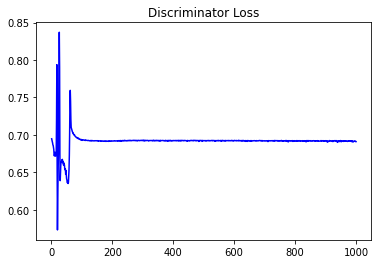

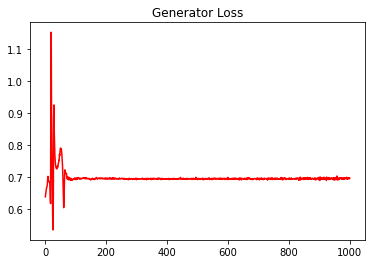

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13001650478839358


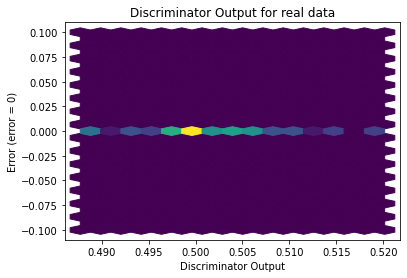

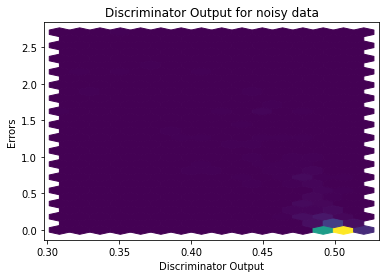

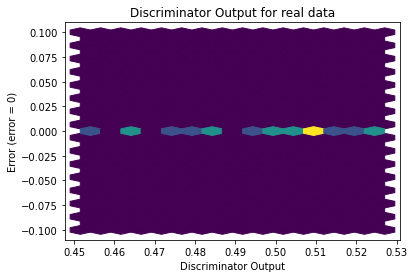

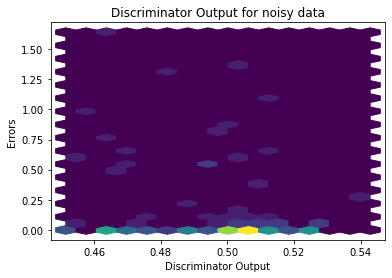

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


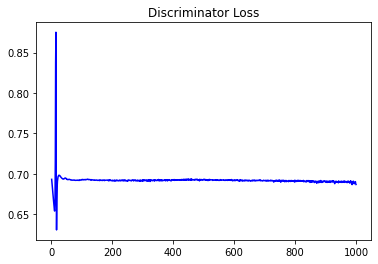

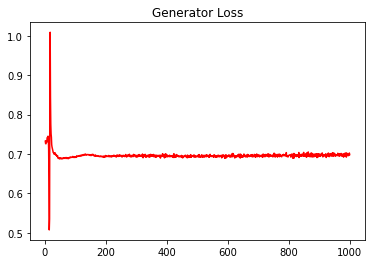

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16763236835676984


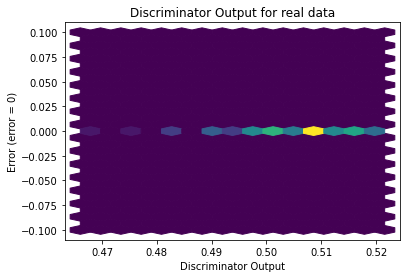

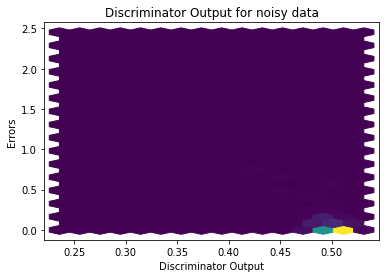

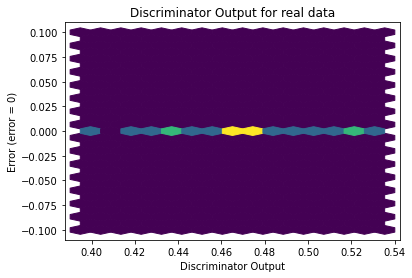

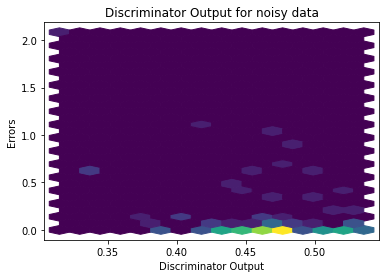

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0805]], requires_grad=True)
